In [1]:
# импортируем нужные для чтения и первичного анализа библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv') # прочитаем сам файл

In [2]:
display(stud_math.head(10)) # рассмотрим, какие данные хранятся в файле
stud_math.info() # рассмотрим, какие типы данных у столбцов

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
print('В датасете следующее количество числовых и строковых столбцов ("object"-строковые, "float64" и "int64" - числовые):\n {}'.format(stud_math.dtypes.value_counts()))

В датасете следующее количество числовых и строковых столбцов ("object"-строковые, "float64" и "int64" - числовые):
 object     17
float64    12
int64       1
dtype: int64


In [4]:
# перечислим названия столбцов, чтобы далее рассмотреть все столбцы по отдельности
stud_math.columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'] #переименовали 1 столбец (studytime_granular)

In [5]:
# Напишем функцию, которую будем применять к столбцам для замены nan на None
def nan_to_None(x):
    if x == 'nan':
        return None
    elif x == 'NaN':
        return None
    else:
        return x

In [6]:
# Начнем наш EDA с первой колонки, в которой перечислены аббревиатуры школы, в которой учится ученики
stud_math.school = stud_math.school.astype(str).apply(nan_to_None) # Сразу заменим nan на None если они есть

,school
GP,349
MS,46


Количество пустых строк в колонке: 0
Количество уникальных значений в колонке: 2
Список уникальных значений: ['GP' 'MS']


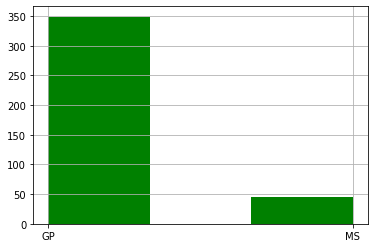

In [7]:
stud_math.school.hist(bins=3, color='g')
display(pd.DataFrame(stud_math.school.value_counts())) #найдем точное число учеников в каждой из типов школ
print('Количество пустых строк в колонке: {}'.format(stud_math.school.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.school.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.school.unique())) # список уникальных значений

In [8]:
# Теперь рассмотрим следующий столбец "sex" - пол ученика ('F' - женский, 'M' - мужской)
stud_math.sex = stud_math.sex.astype(str).apply(nan_to_None) # Сразу заменим nan на None если они есть

,sex
F,208
M,187


Количество пустых строк в колонке: 0
Количество уникальных значений в колонке: 2
Список уникальных значений: ['F' 'M']


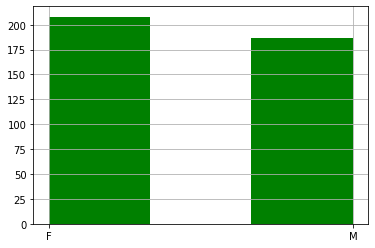

In [9]:
stud_math.sex.hist(bins=3, color='g')
display(pd.DataFrame(stud_math.sex.value_counts()))
print('Количество пустых строк в колонке: {}'.format(stud_math.sex.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.sex.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.sex.unique())) # список уникальных значений

In [10]:
# Идем дальше, теперь рассмотрим колонку с возрастом учеников
stud_math.age=stud_math.age.apply(nan_to_None) # Заменим nan на None если они есть

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Количество пустых строк в колонке: 0
Количество уникальных значений в колонке: 8
Список уникальных значений: [18 17 15 16 19 22 20 21]


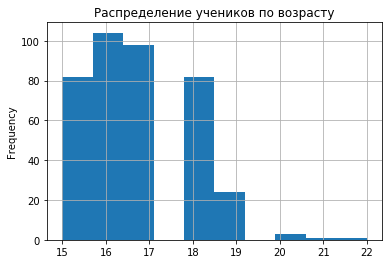

In [11]:
stud_math['age'].plot(kind='hist', grid=True, title='Распределение учеников по возрасту')
display(pd.DataFrame(stud_math.age.value_counts()))
display(stud_math.age.describe())
print('Количество пустых строк в колонке: {}'.format(stud_math.age.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.age.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.age.unique())) # список уникальных значений

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


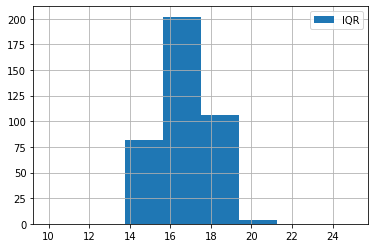

In [12]:
# Большая часть учеников в возрасте между 16 и 18 лет. Также видно, что возможно присутствуют выбросы. Давайте определим так ли это и устраним
median_age = stud_math.age.median() #среднее
IQR_age = stud_math.age.quantile(0.75) - stud_math.age.quantile(0.25) #межквартильный разброс
perc25_age = stud_math.age.quantile(0.25) #нижний квартиль
perc75_age = stud_math.age.quantile(0.75) #верхний квартиль
print('25-й перцентиль: {},'.format(perc25_age), '75-й перцентиль: {},'.format(perc75_age)
      , "IQR: {}, ".format(IQR_age),"Границы выбросов: [{f}, {l}].".format(f=perc25_age - 1.5*IQR_age, l=perc75_age + 1.5*IQR_age))
stud_math.age.loc[stud_math.age.between(perc25_age - 1.5*IQR_age, perc75_age + 1.5*IQR_age)].hist(bins = 8, 
                                                                                  range = (10, 25),
                                                                                  label = 'IQR') #строим гистограмму для IQR
plt.legend()

In [13]:
stud_math = stud_math.loc[stud_math.age.between(perc25_age - 1.5*IQR_age, perc75_age + 1.5*IQR_age)] # Отфильтруем данные, уберем выбросы

In [14]:
# Теперь рассмотрим колонку про тип адреса ученика ('U' - городской, 'R' - за городом)
stud_math.address = stud_math.address.astype(str).apply(nan_to_None) # Сразу заменим nan на None

,address
U,294
R,83


Количество пустых строк в колонке: 17
Количество уникальных значений в колонке: 2
Список уникальных значений: ['U' None 'R']


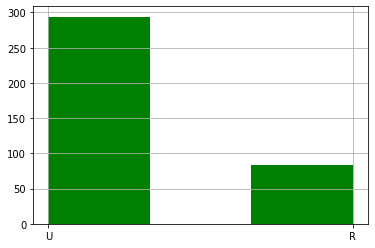

In [15]:
stud_math.address.hist(bins=3, color='g')
display(pd.DataFrame(stud_math.address.value_counts()))
print('Количество пустых строк в колонке: {}'.format(stud_math.address.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.address.nunique())) # количество уникальных значений в колонк
print('Список уникальных значений: {}'.format(stud_math.address.unique())) # список уникальных значений

In [16]:
# Следующая колонка - размер семьи('LE3' <= 3, 'GT3' >3)
stud_math.famsize = stud_math.famsize.astype(str).apply(nan_to_None) # Сразу заменим nan на None

,famsize
GT3,260
LE3,107


Количество пустых строк в колонке: 27
Количество уникальных значений в колонке: 2
Список уникальных значений: [None 'GT3' 'LE3']


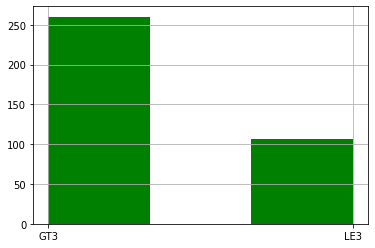

In [17]:
stud_math.famsize.hist(bins=3, color='g')
display(pd.DataFrame(stud_math.famsize.value_counts()))
print('Количество пустых строк в колонке: {}'.format(stud_math.famsize.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.famsize.nunique())) # количество уникальных значений в колонк
print('Список уникальных значений: {}'.format(stud_math.famsize.unique())) # список уникальных значений

In [18]:
# Далее по списку рассмотрим колонку про статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
stud_math.Pstatus=stud_math.Pstatus.astype(str).apply(nan_to_None) # заменим nan на None

,Pstatus
T,313
A,36


Количество пустых строк в колонке: 45
Количество уникальных значений в колонке: 2
Список уникальных значений: ['A' None 'T']


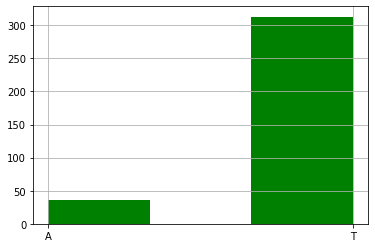

In [19]:
stud_math.Pstatus.hist(bins=3, color='g')
display(pd.DataFrame(stud_math.Pstatus.value_counts()))
print('Количество пустых строк в колонке: {}'.format(stud_math.Pstatus.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.Pstatus.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.Pstatus.unique())) # список уникальных значений

In [20]:
# Рассмотрим колонку про образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
stud_math.Medu = stud_math.Medu.apply(nan_to_None) # заменим nan на None если они есть

,Medu
4.0,131
2.0,102
3.0,96
1.0,59
0.0,3


count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Количество пустых строк в колонке: 3
Количество уникальных значений в колонке: 5
Список уникальных значений: [ 4.  1.  3.  2. nan  0.]


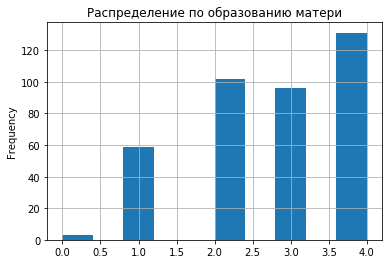

In [21]:
stud_math['Medu'].plot(kind='hist', bins=10, grid=True, title='Распределение по образованию матери')
display(pd.DataFrame(stud_math.Medu.value_counts()))
display(stud_math.Medu.describe())
print('Количество пустых строк в колонке: {}'.format(stud_math.Medu.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.Medu.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.Medu.unique())) # список уникальных значений

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


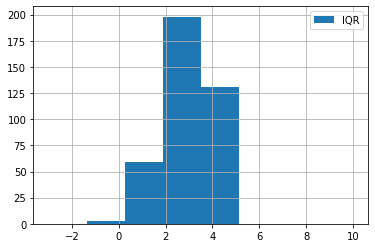

In [22]:
# Проверим на выбросы
median_medu = stud_math.Medu.median() #среднее
IQR_medu = stud_math.Medu.quantile(0.75) - stud_math.Medu.quantile(0.25) #межквартильный разброс
perc25_medu = stud_math.Medu.quantile(0.25) #нижний квартиль
perc75_medu = stud_math.Medu.quantile(0.75) #верхний квартиль
print('25-й перцентиль: {},'.format(perc25_medu), '75-й перцентиль: {},'.format(perc75_medu)
      , "IQR: {}, ".format(IQR_medu),"Границы выбросов: [{f}, {l}].".format(f=perc25_medu - 1.5*IQR_medu, l=perc75_medu + 1.5*IQR_medu))
stud_math.Medu.loc[stud_math.Medu.between(perc25_medu - 1.5*IQR_medu, perc75_medu + 1.5*IQR_medu)].hist(bins = 8, 
                                                                                  range = (-3, 10),
                                                                                  label = 'IQR') #строим гистограмму для IQR
plt.legend()

In [23]:
stud_math = stud_math.loc[stud_math.Medu.between(perc25_medu - 1.5*IQR_medu, perc75_medu + 1.5*IQR_medu)] # Отфильтруем данные, уберем выбросы

In [24]:
# Далее по аналогии с предыдущей, рассмотрим колонку про образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
stud_math.Fedu = stud_math.Fedu.apply(nan_to_None) # заменим nan на None если они есть

,Fedu
2.0,105
3.0,95
4.0,88
1.0,76
0.0,2
40.0,1


count    367.000000
mean       2.623978
std        2.237356
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

Количество пустых строк в колонке: 24
Количество уникальных значений в колонке: 6
Список уникальных значений: [ 4.  1.  2.  3. 40. nan  0.]


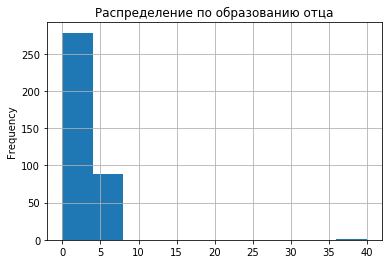

In [25]:
stud_math['Fedu'].plot(kind='hist', bins=10, grid=True, title='Распределение по образованию отца')
display(pd.DataFrame(stud_math.Fedu.value_counts()))
display(stud_math.Fedu.describe())
print('Количество пустых строк в колонке: {}'.format(stud_math.Fedu.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.Fedu.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.Fedu.unique())) # список уникальных значений

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


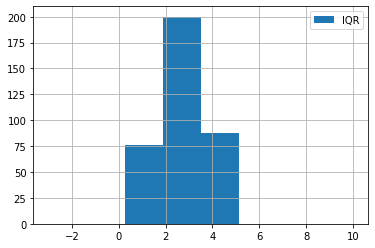

In [26]:
# Присутствует очевидный выброс. Проверим
median_fedu = stud_math.Fedu.median() #среднее
IQR_fedu = stud_math.Fedu.quantile(0.75) - stud_math.Fedu.quantile(0.25) #межквартильный разброс
perc25_fedu = stud_math.Fedu.quantile(0.25) #нижний квартиль
perc75_fedu = stud_math.Fedu.quantile(0.75) #верхний квартиль
print('25-й перцентиль: {},'.format(perc25_fedu), '75-й перцентиль: {},'.format(perc75_fedu)
      , "IQR: {}, ".format(IQR_fedu),"Границы выбросов: [{f}, {l}].".format(f=perc25_fedu - 1.5*IQR_fedu, l=perc75_fedu + 1.5*IQR_fedu))
stud_math.Fedu.loc[stud_math.Fedu.between(perc25_fedu - 1.5*IQR_fedu, perc75_fedu + 1.5*IQR_fedu)].hist(bins = 8, 
                                                                                  range = (-3, 10),
                                                                                  label = 'IQR') #строим гистограмму для IQR
plt.legend()

In [27]:
stud_math = stud_math.loc[stud_math.Fedu.between(perc25_fedu - 1.5*IQR_fedu, perc75_fedu + 1.5*IQR_fedu)] # Отфильтруем данные, уберем выбросы

In [28]:
# Рассморим колонку про работу матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
stud_math.Mjob=stud_math.Mjob.astype(str).apply(nan_to_None) # заменим nan на None

Количество пустых строк в колонке: 19
Количество уникальных значений в колонке: 5
Список уникальных значений: ['at_home' 'health' 'other' 'services' 'teacher' None]


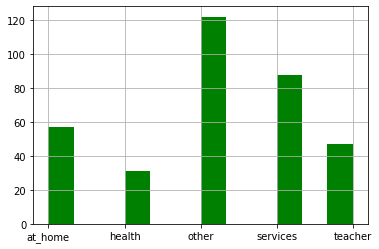

In [29]:
stud_math.Mjob.hist(bins=12, color='g')
print('Количество пустых строк в колонке: {}'.format(stud_math.Mjob.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.Mjob.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.Mjob.unique())) # список уникальных значений

In [30]:
# Далее по аналогии с предыдущей, рассмотрим колонку про работу отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
stud_math.Fjob=stud_math.Fjob.astype(str).apply(nan_to_None) # заменим nan на None

Количество пустых строк в колонке: 34
Количество уникальных значений в колонке: 5
Список уникальных значений: ['teacher' 'other' None 'health' 'services' 'at_home']


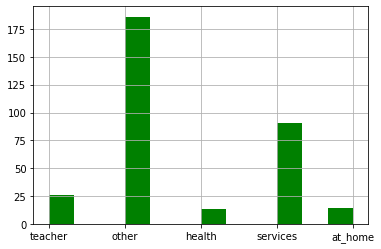

In [31]:
stud_math.Fjob.hist(bins=12, color='g')
print('Количество пустых строк в колонке: {}'.format(stud_math.Fjob.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.Fjob.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.Fjob.unique())) # список уникальных значений

In [32]:
# Рассмотрим колонку про причину выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
stud_math.reason=stud_math.reason.astype(str).apply(nan_to_None) # заменим nan на None

Количество пустых строк в колонке: 16
Количество уникальных значений в колонке: 4
Список уникальных значений: ['course' 'other' 'home' 'reputation' None]


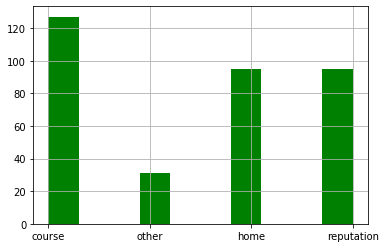

In [33]:
stud_math.reason.hist(color='g')
print('Количество пустых строк в колонке: {}'.format(stud_math.reason.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.reason.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.reason.unique())) # список уникальных значений

In [34]:
# Рассмотрим колонку про опекуна ('mother' - мать, 'father' - отец, 'other' - другое)
stud_math.guardian=stud_math.guardian.astype(str).apply(nan_to_None) # заменим nan на None

Количество пустых строк в колонке: 30
Количество уникальных значений в колонке: 3
Список уникальных значений: ['mother' 'father' 'other' None]


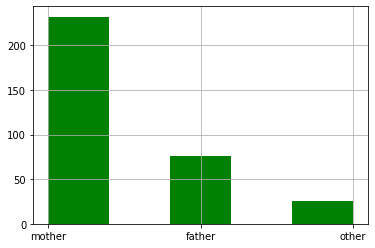

In [35]:
stud_math.guardian.hist(bins=5, color='g')
print('Количество пустых строк в колонке: {}'.format(stud_math.guardian.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.guardian.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.guardian.unique())) # список уникальных значений

In [36]:
# Далее рассмотрим колонку про время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
stud_math.traveltime = stud_math.traveltime.apply(nan_to_None) # заменим nan на None если они есть

,traveltime
1.0,221
2.0,90
3.0,21
4.0,7


count    339.000000
mean       1.451327
std        0.704900
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Количество пустых строк в колонке: 25
Количество уникальных значений в колонке: 4
Список уникальных значений: [ 2.  1.  3. nan  4.]


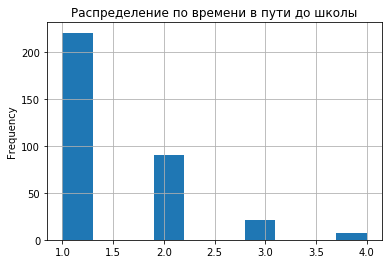

In [37]:
stud_math['traveltime'].plot(kind='hist', bins=10, grid=True, title='Распределение по времени в пути до школы')
display(pd.DataFrame(stud_math.traveltime.value_counts()))
display(stud_math.traveltime.describe())
print('Количество пустых строк в колонке: {}'.format(stud_math.traveltime.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.traveltime.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.traveltime.unique())) # список уникальных значений

In [38]:
# Рассмотрим колонку про время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
stud_math.studytime = stud_math.studytime.apply(nan_to_None) # заменим nan на None если они есть

,studytime
2.0,179
1.0,96
3.0,58
4.0,24


count    357.000000
mean       2.028011
std        0.837532
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Количество пустых строк в колонке: 7
Количество уникальных значений в колонке: 4
Список уникальных значений: [ 2.  3.  1. nan  4.]


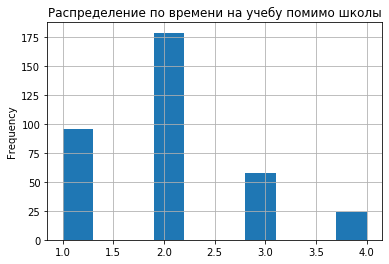

In [39]:
stud_math['studytime'].plot(kind='hist', bins=10, grid=True, title='Распределение по времени на учебу помимо школы')
display(pd.DataFrame(stud_math.studytime.value_counts()))
display(stud_math.studytime.describe())
print('Количество пустых строк в колонке: {}'.format(stud_math.studytime.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.studytime.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.studytime.unique())) # список уникальных значений

In [40]:
# Рассмотрим колонку про количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
stud_math.failures = stud_math.failures.apply(nan_to_None) # заменим nan на None если они есть

,failures
0.0,274
1.0,44
2.0,14
3.0,14


count    346.000000
mean       0.329480
std        0.739054
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Количество пустых строк в колонке: 18
Количество уникальных значений в колонке: 4
Список уникальных значений: [ 0.  3.  2.  1. nan]


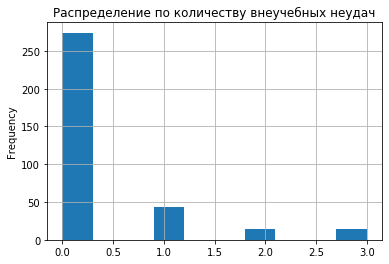

In [41]:
stud_math['failures'].plot(kind='hist', bins=10, grid=True, title='Распределение по количеству внеучебных неудач')
display(pd.DataFrame(stud_math.failures.value_counts()))
display(stud_math.failures.describe())
print('Количество пустых строк в колонке: {}'.format(stud_math.failures.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.failures.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.failures.unique())) # список уникальных значений

In [42]:
# Рассмотрим колонку про дополнительную образовательную поддержку (yes или no)
stud_math.schoolsup=stud_math.schoolsup.astype(str).apply(nan_to_None) # заменим nan на None

Количество пустых строк в колонке: 9
Количество уникальных значений в колонке: 2
Список уникальных значений: ['yes' 'no' None]


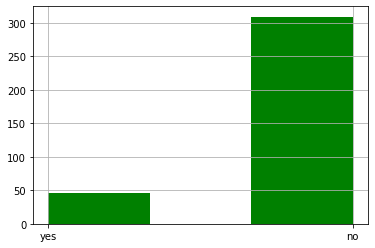

In [43]:
stud_math.schoolsup.hist(bins=3, color='g')
print('Количество пустых строк в колонке: {}'.format(stud_math.schoolsup.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.schoolsup.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.schoolsup.unique())) # список уникальных значений

In [44]:
# Рассмотрим колонку про семейную образовательную поддержку (yes или no)
stud_math.famsup=stud_math.famsup.astype(str).apply(nan_to_None) # заменим nan на None

Количество пустых строк в колонке: 35
Количество уникальных значений в колонке: 2
Список уникальных значений: ['no' 'yes' None]


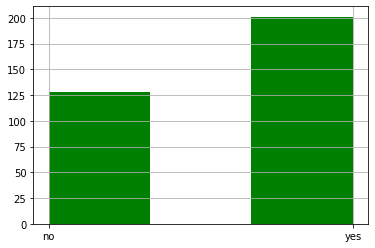

In [45]:
stud_math.famsup.hist(bins=3, color='g')
print('Количество пустых строк в колонке: {}'.format(stud_math.famsup.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.famsup.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.famsup.unique())) # список уникальных значений

In [46]:
# Рассмотрим колонку про дополнительные платные занятия по математике (yes или no)
stud_math.paid=stud_math.paid.astype(str).apply(nan_to_None) # заменим nan на None

Количество пустых строк в колонке: 37
Количество уникальных значений в колонке: 2
Список уникальных значений: ['no' None 'yes']


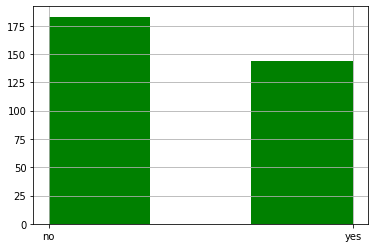

In [47]:
stud_math.paid.hist(bins=3, color='g')
print('Количество пустых строк в колонке: {}'.format(stud_math.paid.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.paid.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.paid.unique())) # список уникальных значений

In [48]:
# Рассмотрим колонку про дополнительные внеучебные занятия (yes или no)
stud_math.activities=stud_math.activities.astype(str).apply(nan_to_None) # заменим nan на None

Количество пустых строк в колонке: 14
Количество уникальных значений в колонке: 2
Список уникальных значений: ['no' 'yes' None]


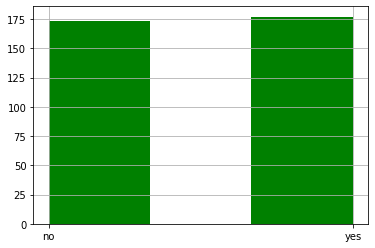

In [49]:
stud_math.activities.hist(bins=3, color='g')
print('Количество пустых строк в колонке: {}'.format(stud_math.activities.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.activities.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.activities.unique())) # список уникальных значений

In [50]:
# Рассмотрим колонку про посещение детского сада (yes или no)
stud_math.nursery=stud_math.nursery.astype(str).apply(nan_to_None) # заменим nan на None

Количество пустых строк в колонке: 16
Количество уникальных значений в колонке: 2
Список уникальных значений: ['yes' 'no' None]


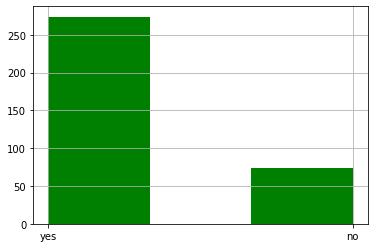

In [51]:
stud_math.nursery.hist(bins=3, color='g')
print('Количество пустых строк в колонке: {}'.format(stud_math.nursery.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.nursery.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.nursery.unique())) # список уникальных значений

In [52]:
# Колонку про studytime_granular мы проигнорируем, т.к. она полностью совпдает с колонкой studytime, 
# которую мы проанализировали ранее

In [53]:
# Рассмотрим колонку про желание получить высшее образование (yes или no)
stud_math.higher=stud_math.higher.astype(str).apply(nan_to_None) # заменим nan на None

Количество пустых строк в колонке: 16
Количество уникальных значений в колонке: 2
Список уникальных значений: ['yes' None 'no']


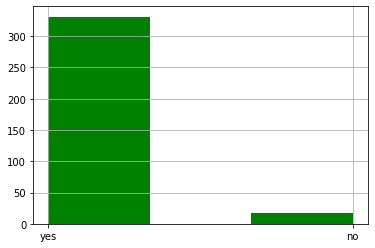

In [54]:
stud_math.higher.hist(bins=3, color='g')
print('Количество пустых строк в колонке: {}'.format(stud_math.higher.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.higher.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.higher.unique())) # список уникальных значений

In [55]:
# Рассмотрим колонку про наличие интернета дома (yes или no)
stud_math.internet=stud_math.internet.astype(str).apply(nan_to_None) # заменим nan на None

Количество пустых строк в колонке: 32
Количество уникальных значений в колонке: 2
Список уникальных значений: [None 'yes' 'no']


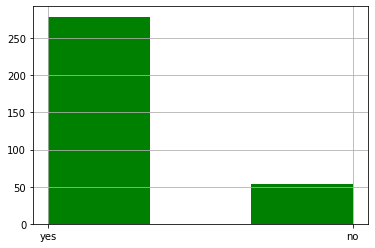

In [56]:
stud_math.internet.hist(bins=3, color='g')
print('Количество пустых строк в колонке: {}'.format(stud_math.internet.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.internet.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.internet.unique())) # список уникальных значений

In [57]:
# Рассмотрим колонку про нахождение в романтических отношениях (yes или no)
stud_math.romantic=stud_math.romantic.astype(str).apply(nan_to_None) # заменим nan на None

Количество пустых строк в колонке: 27
Количество уникальных значений в колонке: 2
Список уникальных значений: ['no' None 'yes']


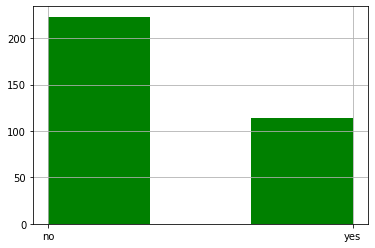

In [58]:
stud_math.romantic.hist(bins=3, color='g')
print('Количество пустых строк в колонке: {}'.format(stud_math.romantic.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.romantic.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.romantic.unique())) # список уникальных значений

In [59]:
# Рассмотрим колонку про семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
stud_math.famrel = stud_math.famrel.apply(nan_to_None) # заменим nan на None если они есть

,famrel
4.0,166
5.0,93
3.0,57
2.0,16
1.0,7
-1.0,1


count    340.000000
mean       3.935294
std        0.941624
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

Количество пустых строк в колонке: 24
Количество уникальных значений в колонке: 6
Список уникальных значений: [ 4.  5.  3. nan -1.  2.  1.]


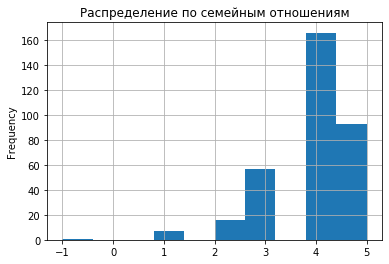

In [60]:
stud_math['famrel'].plot(kind='hist', grid=True, title='Распределение по семейным отношениям')
display(pd.DataFrame(stud_math.famrel.value_counts()))
display(stud_math.famrel.describe())
print('Количество пустых строк в колонке: {}'.format(stud_math.famrel.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.famrel.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.famrel.unique())) # список уникальных значений

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


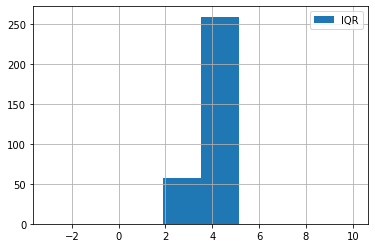

In [61]:
# Очевидно присутствует выброс. Проверим
median_famrel = stud_math.famrel.median() #среднее
IQR_famrel = stud_math.famrel.quantile(0.75) - stud_math.famrel.quantile(0.25) #межквартильный разброс
perc25_famrel = stud_math.famrel.quantile(0.25) #нижний квартиль
perc75_famrel = stud_math.famrel.quantile(0.75) #верхний квартиль
print('25-й перцентиль: {},'.format(perc25_famrel), '75-й перцентиль: {},'.format(perc75_famrel)
      , "IQR: {}, ".format(IQR_famrel),"Границы выбросов: [{f}, {l}].".format(f=perc25_famrel - 1.5*IQR_famrel, l=perc75_famrel + 1.5*IQR_famrel))
stud_math.famrel.loc[stud_math.famrel.between(perc25_famrel - 1.5*IQR_famrel, perc75_famrel + 1.5*IQR_famrel)].hist(bins = 8, 
                                                                                  range = (-3, 10),
                                                                                  label = 'IQR') #строим гистограмму для IQR
plt.legend()

In [62]:
stud_math = stud_math.loc[stud_math.famrel.between(perc25_famrel - 1.5*IQR_famrel, perc75_famrel + 1.5*IQR_famrel)] # Отфильтруем данные, уберем выбросы

In [63]:
# Рассмотрим колонку про свободное время после школы (от 1 - очень мало до 5 - очень мого)
stud_math.freetime = stud_math.freetime.apply(nan_to_None) # заменим nan на None если они есть

,freetime
3.0,122
4.0,89
2.0,49
5.0,32
1.0,15


count    307.000000
mean       3.241042
std        1.003528
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Количество пустых строк в колонке: 9
Количество уникальных значений в колонке: 5
Список уникальных значений: [ 3.  2.  4.  1.  5. nan]


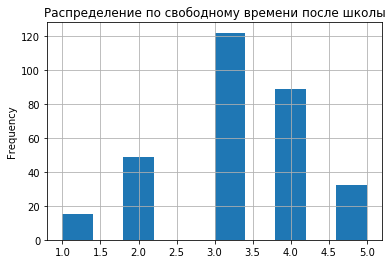

In [64]:
stud_math['freetime'].plot(kind='hist', grid=True, title='Распределение по свободному времени после школы')
display(pd.DataFrame(stud_math.freetime.value_counts()))
display(stud_math.freetime.describe())
print('Количество пустых строк в колонке: {}'.format(stud_math.freetime.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.freetime.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.freetime.unique())) # список уникальных значений

In [65]:
# Рассмотрим колонку про проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
stud_math.goout = stud_math.goout.apply(nan_to_None) # заменим nan на None если они есть

,goout
3.0,108
2.0,80
4.0,65
5.0,40
1.0,16


count    309.000000
mean       3.106796
std        1.089316
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Количество пустых строк в колонке: 7
Количество уникальных значений в колонке: 5
Список уникальных значений: [ 4.  3.  2.  1.  5. nan]


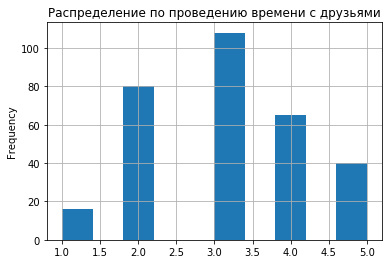

In [66]:
stud_math['goout'].plot(kind='hist', grid=True, title='Распределение по проведению времени с друзьями')
display(pd.DataFrame(stud_math.goout.value_counts()))
display(stud_math.goout.describe())
print('Количество пустых строк в колонке: {}'.format(stud_math.goout.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.goout.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.goout.unique())) # список уникальных значений

In [67]:
# Рассмотрим колонку про текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
stud_math.health = stud_math.health.apply(nan_to_None) # заменим nan на None если они есть

,health
5.0,105
3.0,75
4.0,54
2.0,35
1.0,34


count    303.000000
mean       3.531353
std        1.361062
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

Количество пустых строк в колонке: 13
Количество уникальных значений в колонке: 5
Список уникальных значений: [ 3.  5.  1.  2.  4. nan]


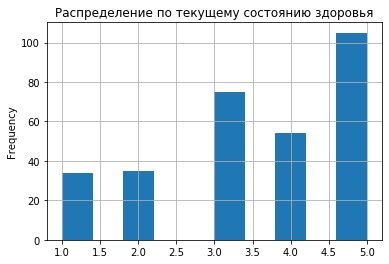

In [68]:
stud_math['health'].plot(kind='hist', grid=True, title='Распределение по текущему состоянию здоровья')
display(pd.DataFrame(stud_math.health.value_counts()))
display(stud_math.health.describe())
print('Количество пустых строк в колонке: {}'.format(stud_math.health.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.health.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.health.unique())) # список уникальных значений

In [69]:
# Рассмотрим колонку про количеству пропущенных занятий
stud_math.absences = stud_math.absences.apply(nan_to_None) # заменим nan на None если они есть

,absences
0.0,90
2.0,51
4.0,44
6.0,25
8.0,17
10.0,13
12.0,10
14.0,7
3.0,7
16.0,6


count    305.000000
mean       6.190164
std       14.019837
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      212.000000
Name: absences, dtype: float64

Количество пустых строк в колонке: 11
Количество уникальных значений в колонке: 32
Список уникальных значений: [  6.   4.  10.   2.   0.  16.  nan   8.  25.  14.  12.  54.  18.  26.
  56.  24.  28.  13.  15.  22.   3.  20.  21.   1.   9.  38.  40.  23.
   7.  11.  17.   5. 212.]


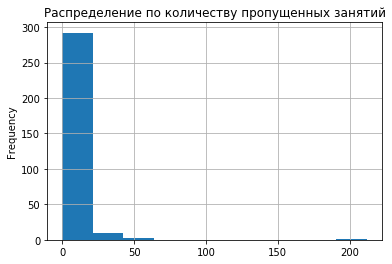

In [70]:
stud_math['absences'].plot(kind='hist', grid=True, title='Распределение по количеству пропущенных занятий')
display(pd.DataFrame(stud_math.absences.value_counts().sort_values(ascending=False)))
display(stud_math.absences.describe())
print('Количество пустых строк в колонке: {}'.format(stud_math.absences.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.absences.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.absences.unique())) # список уникальных значений

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 9.5].


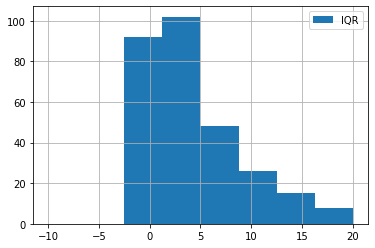

In [71]:
# Очевидно присутствуют выбросы. Проверим
median_abs = stud_math.absences.median() #среднее
IQR_abs = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25) #межквартильный разброс
perc25_abs = stud_math.absences.quantile(0.25) #нижний квартиль
perc75_abs = stud_math.absences.quantile(0.75) #верхний квартиль
print('25-й перцентиль: {},'.format(perc25_abs), '75-й перцентиль: {},'.format(perc75_abs)
      , "IQR: {}, ".format(IQR_abs),"Границы выбросов: [{f}, {l}].".format(f=perc25_abs - 1.5*IQR_abs, l=perc75_abs + 1.5*IQR_famrel))
stud_math.absences.loc[stud_math.absences.between(perc25_abs - 1.5*IQR_abs, perc75_abs + 1.5*IQR_abs)].hist(bins = 8, 
                                                                                  range = (-10, 20),
                                                                                  label = 'IQR') #строим гистограмму для IQR
plt.legend()

In [72]:
stud_math = stud_math.loc[stud_math.absences.between(perc25_abs - 1.5*IQR_abs, perc75_abs + 1.5*IQR_abs)] # Отфильтруем данные, уберем выбросы

In [73]:
# И наконец рассмотрим колонку про баллы по госэкзамену по математике
stud_math.score = stud_math.score.apply(nan_to_None) # заменим nan на None если они есть

,score
50.0,48
55.0,35
0.0,26
65.0,24
70.0,23
75.0,22
60.0,22
40.0,20
45.0,16
80.0,13


count    286.000000
mean      52.430070
std       22.221856
min        0.000000
25%       45.000000
50%       55.000000
75%       68.750000
max      100.000000
Name: score, dtype: float64

Количество пустых строк в колонке: 5
Количество уникальных значений в колонке: 17
Список уникальных значений: [ 30.  50.  75.  55.  45.  80.  70.  25.  60.  85.  90.  65. 100.  35.
  40.  95.   0.  nan]


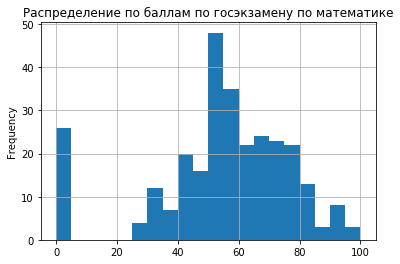

In [74]:
stud_math['score'].plot(kind='hist', grid=True, bins=20, title='Распределение по баллам по госэкзамену по математике')
display(pd.DataFrame(stud_math.score.value_counts()))
display(stud_math.score.describe())
print('Количество пустых строк в колонке: {}'.format(stud_math.score.isna().sum())) # количество пустых строк в колонке
print('Количество уникальных значений в колонке: {}'.format(stud_math.score.nunique())) # количество уникальных значений в колонке
print('Список уникальных значений: {}'.format(stud_math.score.unique())) # список уникальных значений

In [75]:
# Подводя предварительные итоги о качестве данных, можно сказать, что в целом качество данных удовлетворительное
# Пустых строк в колонках, в среднем, не более 10%
# Также не пришлось проводить большое число преобразований самих данных
# При этом количество уникальных значений для номинативных переменных также довольно высокое

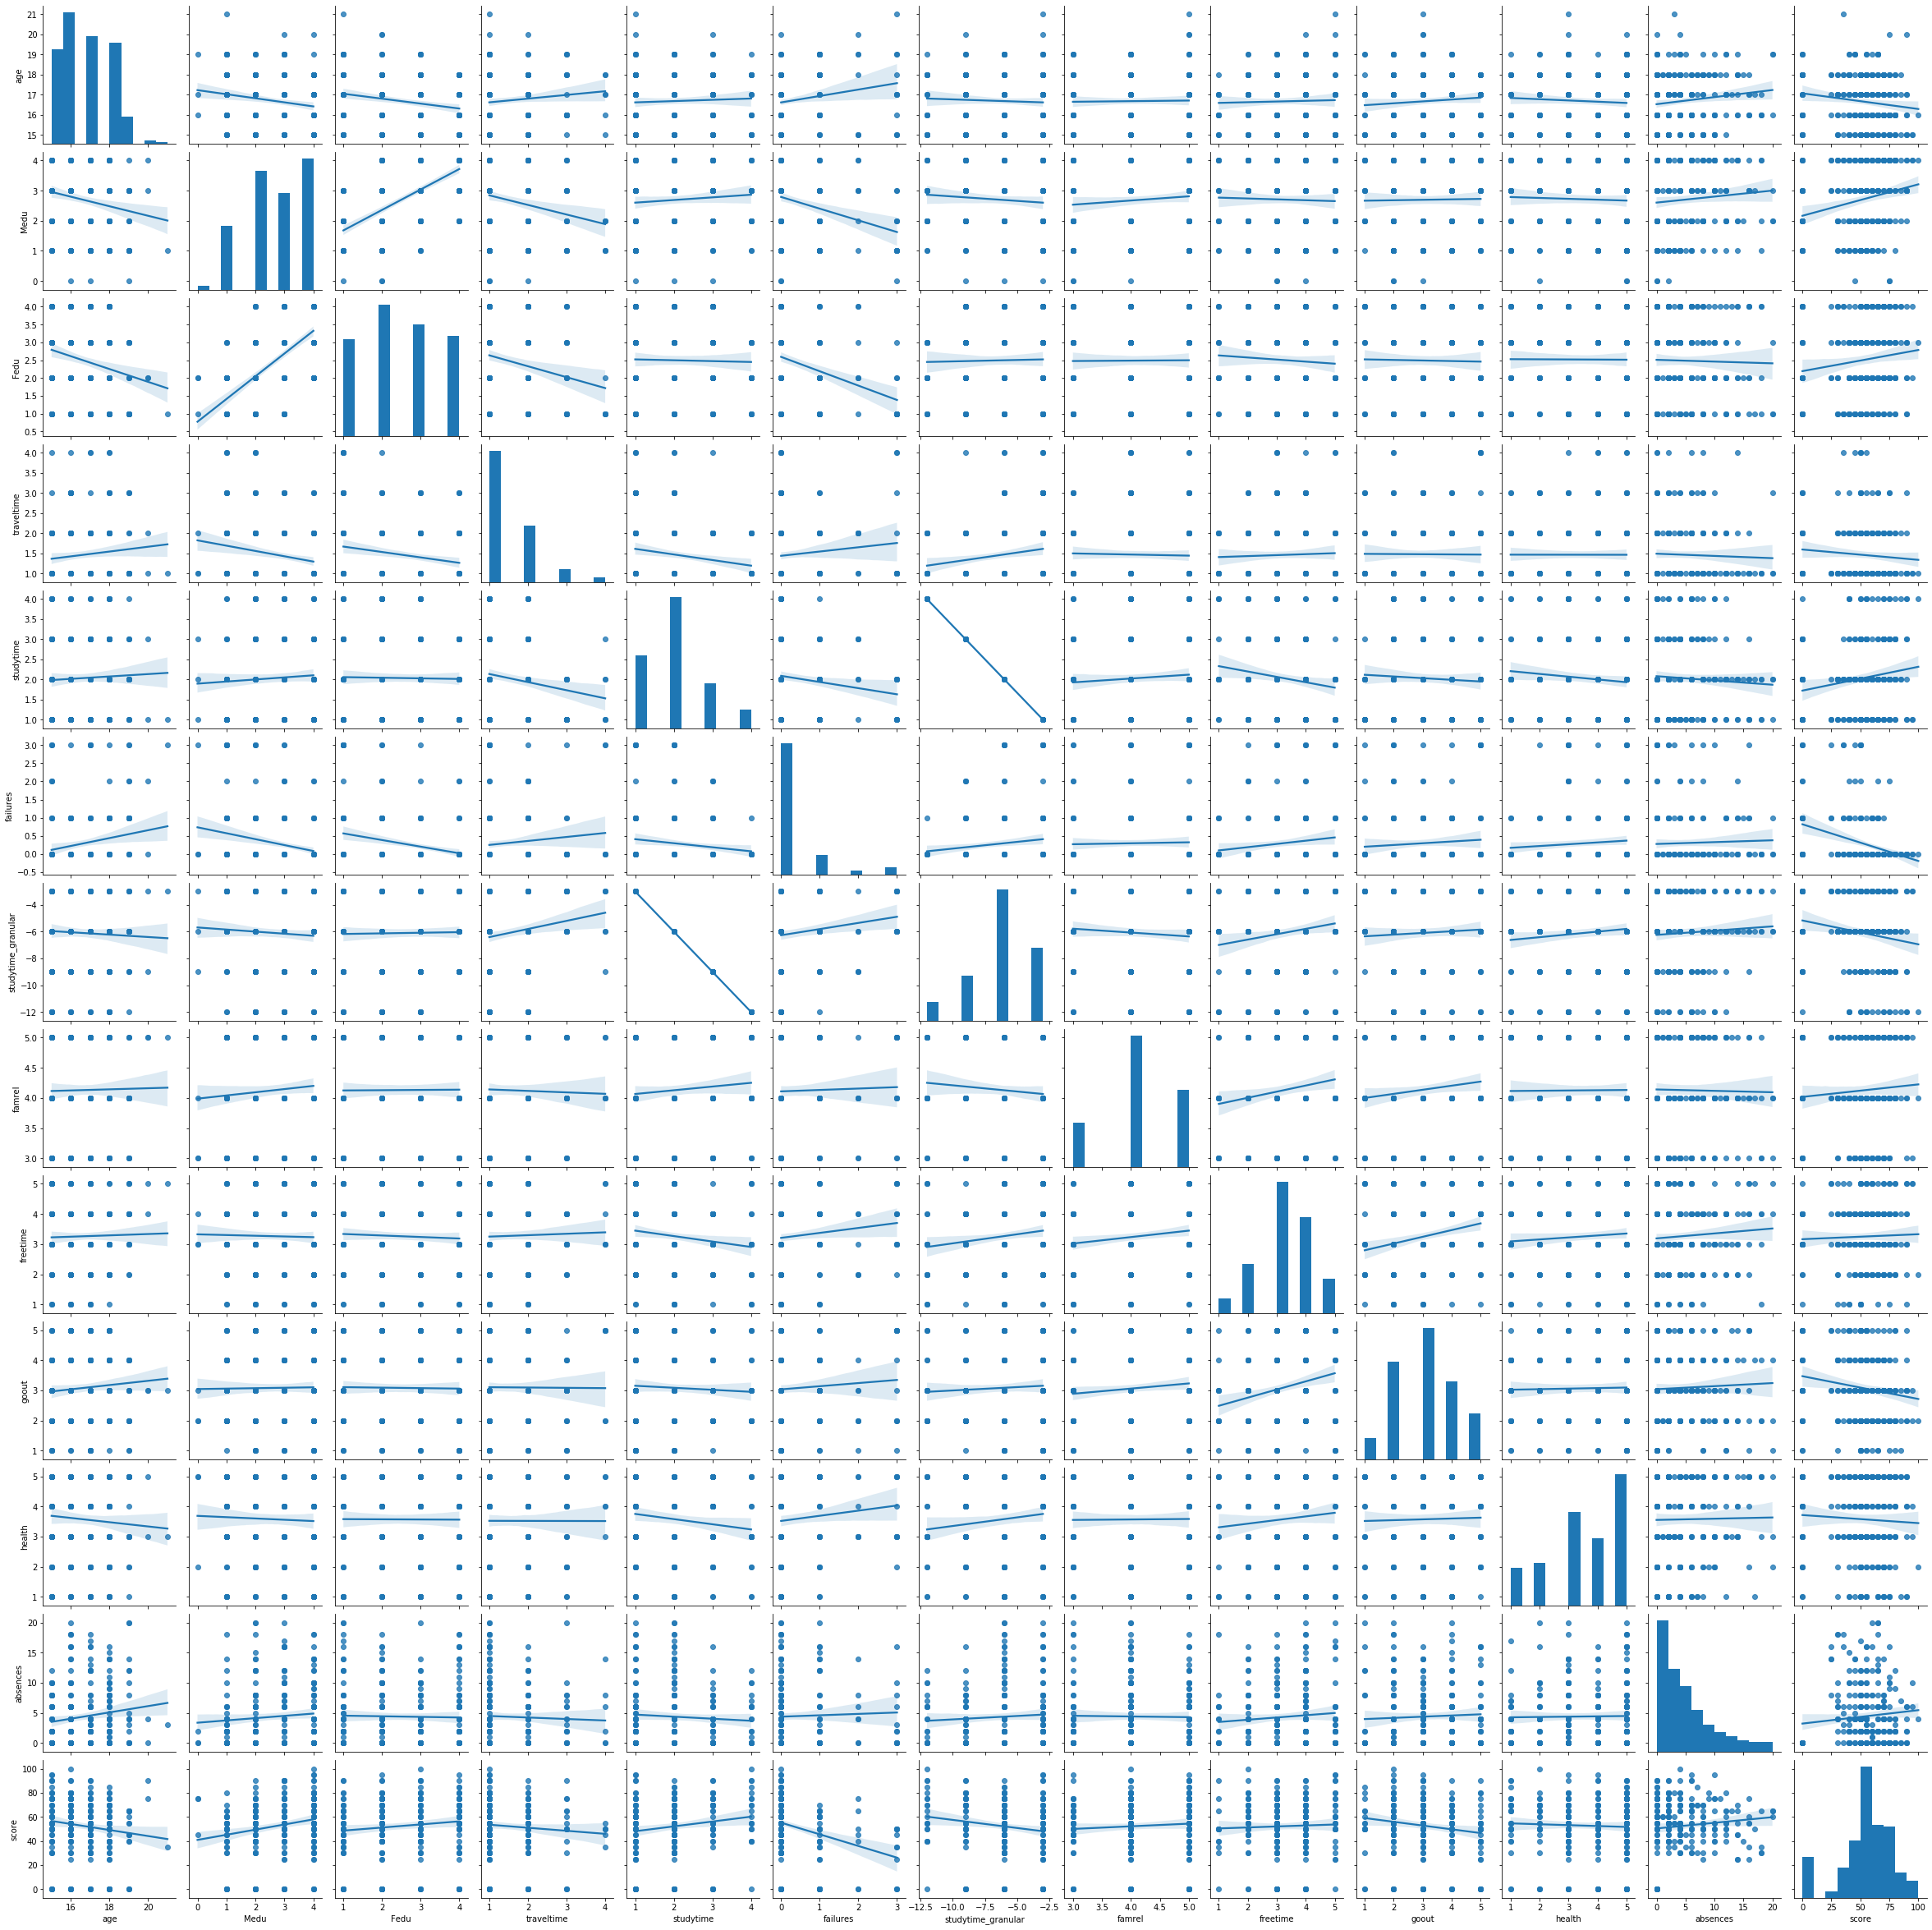

In [76]:
# Проведем корреляционный анализ количественных переменных
sns.pairplot(stud_math, kind = 'reg')

In [77]:
# Составим матрицу корреляций
stud_math.corr().sort_values('score',ascending=False)

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
score,-0.139637,0.211013,0.123381,-0.080663,0.154664,-0.312516,-0.154664,0.067493,0.036711,-0.153577,-0.044542,0.102229,1.000000
Medu,-0.179108,1.000000,0.658136,-0.205191,0.067483,-0.251776,-0.067483,0.085749,-0.026065,0.014709,-0.035539,0.087004,0.211013
studytime,0.043621,0.067483,-0.019132,-0.167894,1.000000,-0.130597,-1.000000,0.077058,-0.155438,-0.052908,-0.108763,-0.060406,0.154664
Fedu,-0.210172,0.658136,1.000000,-0.203490,-0.019132,-0.271115,0.019132,0.006874,-0.053789,-0.015979,-0.004670,-0.022163,0.123381
absences,0.135958,0.087004,-0.022163,-0.037279,-0.060406,0.034164,0.060406,-0.016253,0.078289,0.044907,0.014727,1.000000,0.102229
famrel,0.016751,0.085749,0.006874,-0.025928,0.077058,0.024841,-0.077058,1.000000,0.147600,0.108065,0.008281,-0.016253,0.067493
freetime,0.027586,-0.026065,-0.053789,0.033911,-0.155438,0.121270,0.155438,0.147600,1.000000,0.245584,0.088651,0.078289,0.036711
health,-0.066258,-0.035539,-0.004670,-0.001334,-0.108763,0.091954,0.108763,0.008281,0.088651,0.022268,1.000000,0.014727,-0.044542
traveltime,0.105246,-0.205191,-0.203490,1.000000,-0.167894,0.108021,0.167894,-0.025928,0.033911,-0.006850,-0.001334,-0.037279,-0.080663
age,1.000000,-0.179108,-0.210172,0.105246,0.043621,0.186194,-0.043621,0.016751,0.027586,0.081508,-0.066258,0.135958,-0.139637


In [84]:
# Как мы видим из корреляционного анализа, 
# ни один из параметров не коррелирует полностью с баллами по госэкзамену по математике
# Тем не менее, на баллы по госэкзамену по математике наиболее влияют следующие параметры: 
# образование матери (Medu), время на учёбу помимо школы в неделю (studytime), 
# образование отца (Fedu), количество пропущенных занятий (absences), семейные отношения (famrel), а также
# свободное время после школы (freetime)
# Именно эти перечисленные переменные предлагаем оставить в датасете для дальнейшего построения модели

In [79]:
# Проведем анализ номинативных переменных:
def get_boxplot(column): 
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

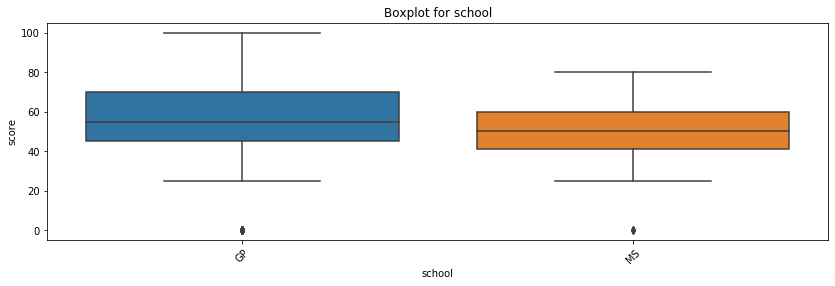

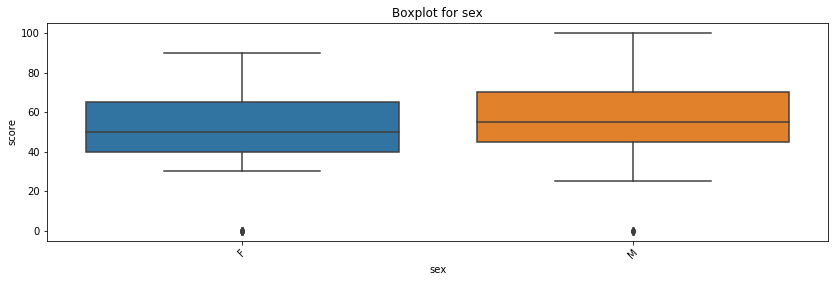

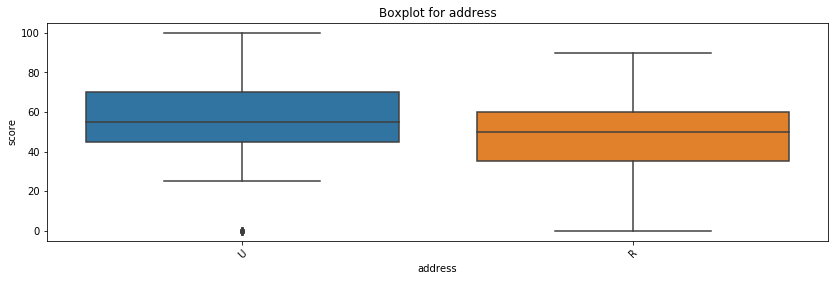

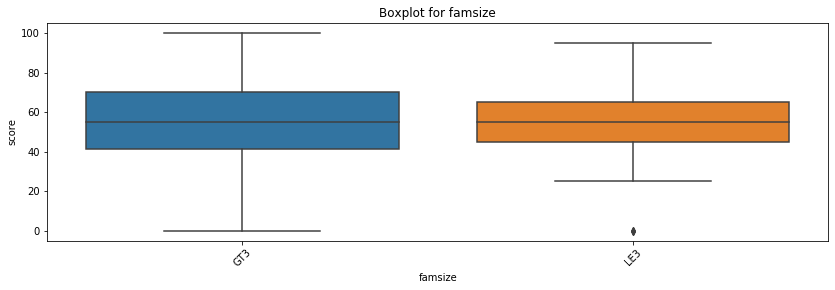

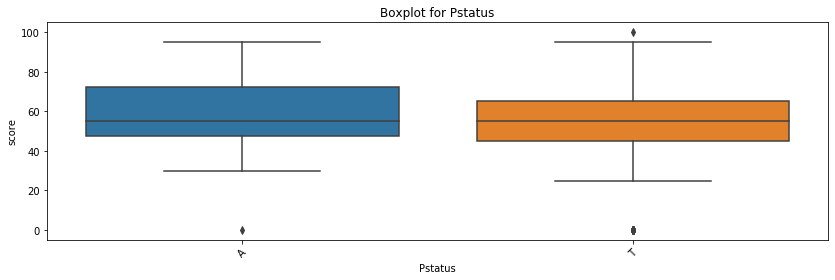

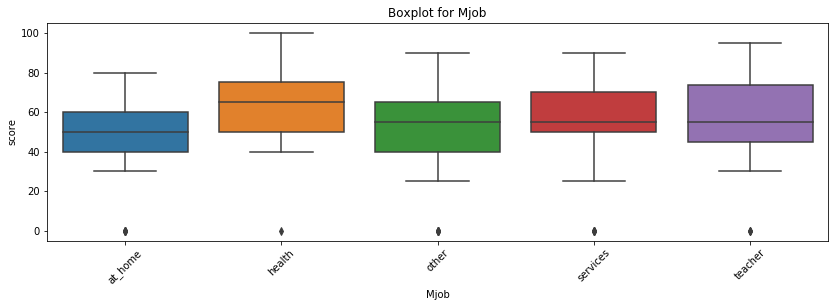

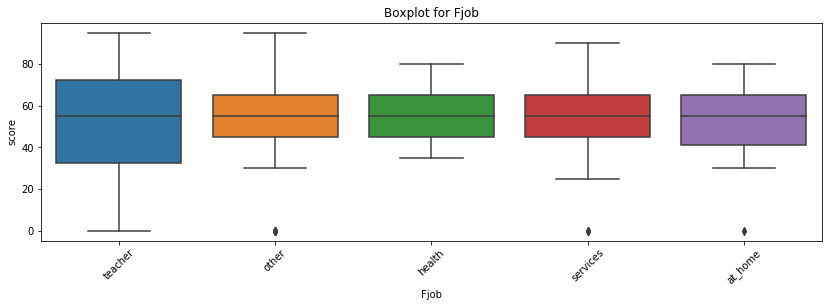

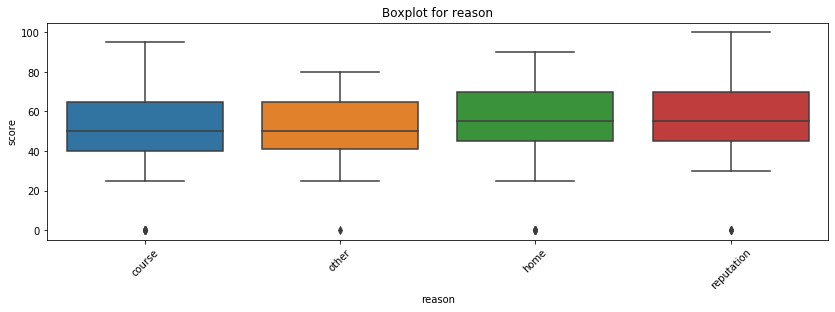

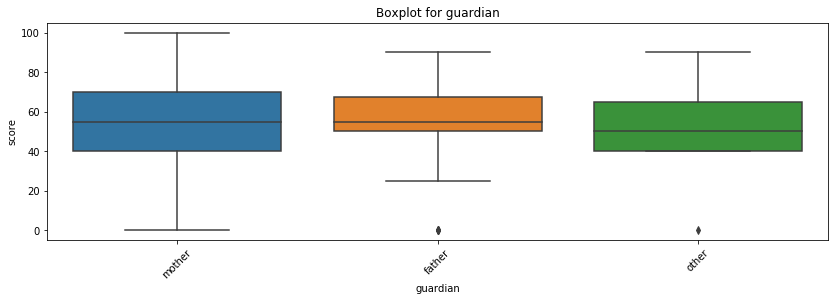

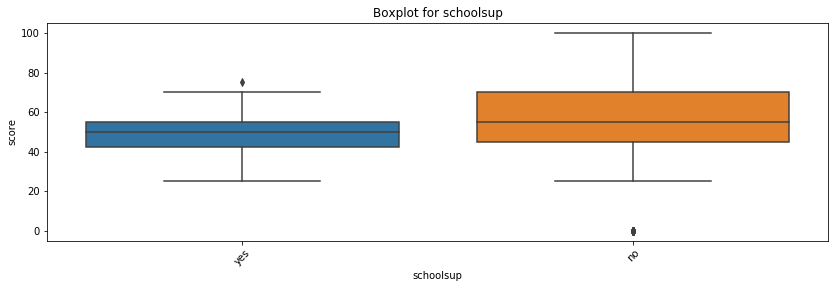

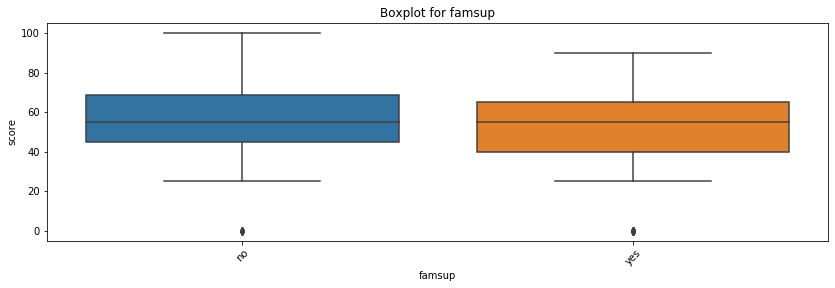

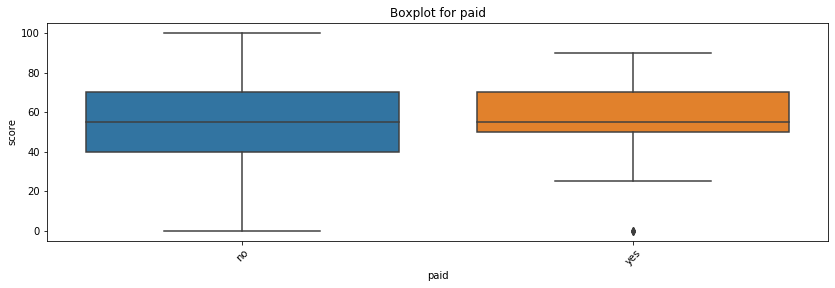

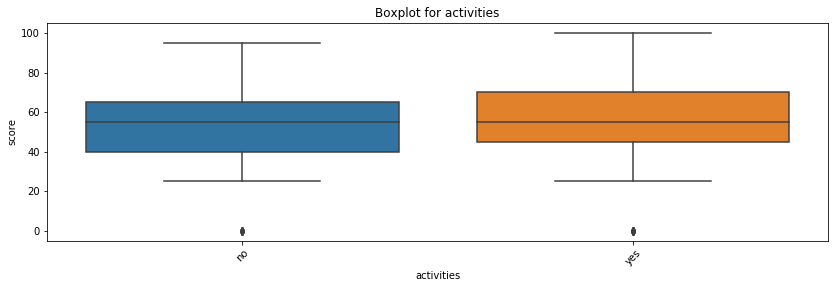

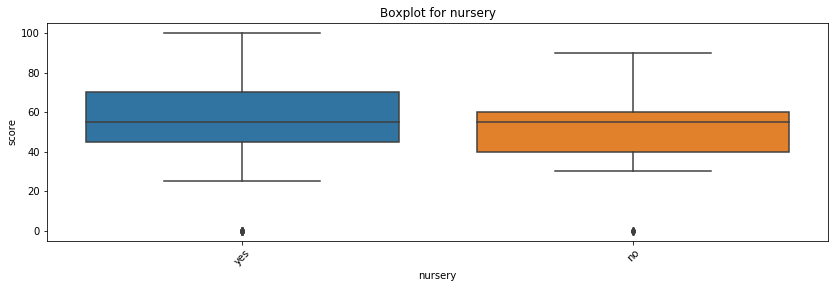

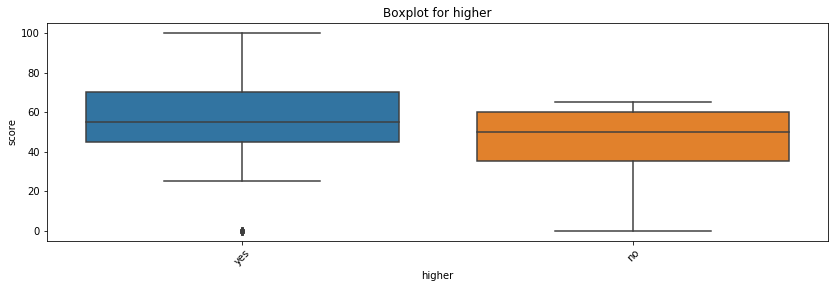

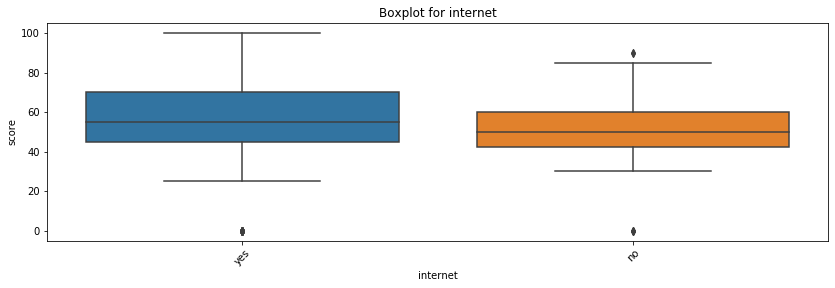

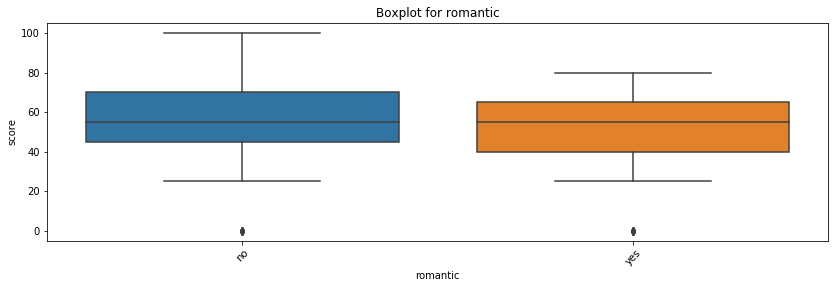

In [80]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [81]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [82]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


In [85]:
# По графикам распределения баллов в зависимости от значения номинативных переменных и 
# по результатам теста Стьюдента, мы можем сделать вывод, 
# что все переменные так или иначе не значительно влияют на итоговые баллы. 
# При этом, значения переменной Mjob (работа матери) имеет наибольшее влияние. 
# Эту переменную предлагаем оставить в датасете для дальнейшего построения модели

In [87]:
# Выводы
# По результату проведенного разведывательного анализа данных в рамках проекта UNICEF, 
# целью которого является отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет 
# на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска
# в рамках подготовительной работы для определения параметров будущей модели, 
# которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы, 
# были выбраны переменные, которые будут использованы в дальнейшем построении модели, а именно: 
# образование матери (Medu), время на учёбу помимо школы в неделю (studytime), 
# образование отца (Fedu), количество пропущенных занятий (absences), семейные отношения (famrel),
# свободное время после школы (freetime), а также работа матери (Mjob).
# В целом считаю качество данных в датасете удовлетворительными